In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("/Users/ekide/Downloads/nndb_flat.csv")

In [11]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [15]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617
ID,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,...,44258,44259,44260,48052,80200,83110,90240,90480,90560,93600
FoodGroup,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,Dairy and Egg Products,...,Sweets,Sweets,Sweets,Cereal Grains and Pasta,Finfish and Shellfish Products,Finfish and Shellfish Products,Finfish and Shellfish Products,Sweets,Finfish and Shellfish Products,Finfish and Shellfish Products
ShortDescrip,"BUTTER,WITH SALT","BUTTER,WHIPPED,WITH SALT","BUTTER OIL,ANHYDROUS","CHEESE,BLUE","CHEESE,BRICK","CHEESE,BRIE","CHEESE,CAMEMBERT","CHEESE,CARAWAY","CHEESE,CHEDDAR","CHEESE,CHESHIRE",...,"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX","PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,REG,DRY MIX","PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY...",VITAL WHEAT GLUTEN,"FROG LEGS,RAW","MACKEREL,SALTED","SCALLOP,(BAY&SEA),CKD,STMD","SYRUP,CANE","SNAIL,RAW","TURTLE,GREEN,RAW"
Descrip,"Butter, salted","Butter, whipped, with salt","Butter oil, anhydrous","Cheese, blue","Cheese, brick","Cheese, brie","Cheese, camembert","Cheese, caraway","Cheese, cheddar","Cheese, cheshire",...,"Puddings, chocolate flavor, low calorie, regul...","Puddings, all flavors except chocolate, low ca...","Puddings, all flavors except chocolate, low ca...",Vital wheat gluten,"Frog legs, raw","Fish, mackerel, salted","Mollusks, scallop, (bay and sea), cooked, steamed","Syrup, Cane","Mollusks, snail, raw","Turtle, green, raw"
CommonName,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


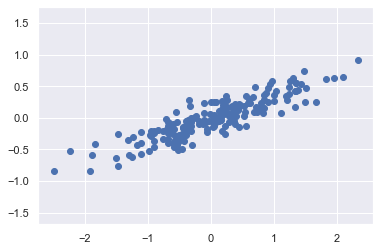

In [19]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [21]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [22]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [26]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


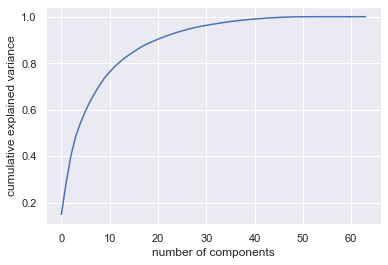

In [27]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k], 
                          np.round(df.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1
1,VitB6_mg,VitB6_USRDA,1
2,VitB12_mcg,VitB12_USRDA,1
3,VitC_mg,VitC_USRDA,1
4,VitE_mg,VitE_USRDA,1
5,Folate_mcg,Folate_USRDA,1
6,Niacin_mg,Niacin_USRDA,1
7,Riboflavin_mg,Riboflavin_USRDA,1
8,Thiamin_mg,Thiamin_USRDA,1
9,Calcium_mg,Calcium_USRDA,1
